In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
reviews = pd.read_csv("/content/french_books_reviews.csv")

In [3]:
reviews.head()

,Unnamed: 0,book_title,author,reader_review,rating,label
0,0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1
1,1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1
2,2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1
3,3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0
4,4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1


In [6]:
data = reviews.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


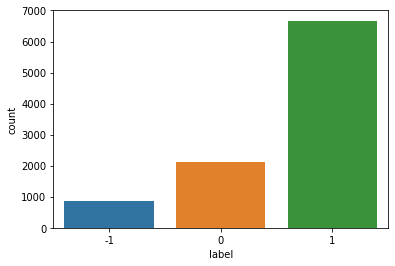

In [8]:
sns.countplot(data['label'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


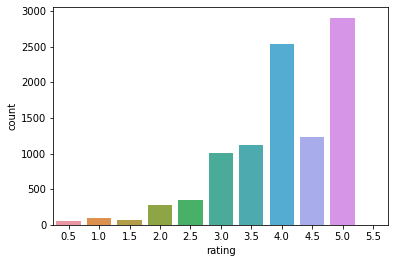

In [10]:
sns.countplot(data['rating'])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
encoder = TfidfVectorizer(min_df = 1,lowercase = True,stop_words = 'english')

In [13]:
data.head()

,Unnamed: 0,book_title,author,reader_review,rating,label
0,0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1
1,1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1
2,2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1
3,3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0
4,4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1


In [17]:
data.isnull().sum()

Unnamed: 0       0
book_title       0
author           0
reader_review    0
rating           0
label            0
dtype: int64

In [15]:
data.shape

(9658, 6)

In [18]:
data.dropna(inplace = True)

In [19]:
list(data.columns)

['Unnamed: 0', 'book_title', 'author', 'reader_review', 'rating', 'label']

In [44]:
X = data['book_title']
Y = data['label']
print(X)
print(Y)

0                  Le Démon de la Colline aux Loups
1                                            Simple
2                La plus secrète mémoire des hommes
3                                          Trancher
4                          La guerre d'Alan, tome 2
                           ...                     
9653                        Un grand méchant loup !
9654    Travailler: La grande affaire de l'humanité
9655                                   Leur domaine
9656                               Ivan le terrible
9657                Les arbres aussi font la guerre
Name: book_title, Length: 9645, dtype: object
0       1
1       1
2       1
3       0
4       1
       ..
9653    1
9654    1
9655    1
9656    1
9657    1
Name: label, Length: 9645, dtype: int64


In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(9645,) (6751,) (2894,)


In [48]:
train_transform = encoder.fit_transform(X_train)


In [49]:
print(train_transform)


  (0, 6)	0.6595865901793498
  (0, 5924)	0.24375439750918965
  (0, 690)	0.7110058535275996
  (1, 3962)	1.0
  (2, 2632)	0.5984642420701692
  (2, 5413)	0.7606919620190711
  (2, 3438)	0.2513728105483053
  (3, 137)	0.6679759268395206
  (3, 1725)	0.29462363827510624
  (3, 4826)	0.6466498687096179
  (3, 3362)	0.221018144572469
  (4, 1757)	0.5625848760514156
  (4, 1889)	0.29938329478253983
  (4, 5949)	0.7410294627591151
  (4, 3362)	0.2115259685388569
  (5, 3611)	0.7742926312393053
  (5, 1463)	0.6328277184262028
  (6, 331)	0.7568641354919572
  (6, 3235)	0.6535722457433549
  (7, 132)	0.7071067811865476
  (7, 6071)	0.7071067811865476
  (8, 5753)	0.2659426184249916
  (8, 4789)	0.2783099401664144
  (8, 2856)	0.1703051270322141
  (8, 4769)	0.25716786400567576
  :	:
  (6743, 2736)	0.9566961733451852
  (6743, 5924)	0.2910883575594863
  (6744, 320)	1.0
  (6745, 4015)	0.4968158439649356
  (6745, 5790)	0.5933144208414568
  (6745, 4378)	0.44300506568776904
  (6745, 5398)	0.4526571848341202
  (6746, 5142)	

In [50]:
print(test_transform)

  (0, 0)	1.0


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = RandomForestClassifier()

In [53]:
model.fit(train_transform,Y_train)

RandomForestClassifier()

In [55]:
train_predict = model.predict(train_transform)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(Y_train,train_predict)

0.9357132276699748

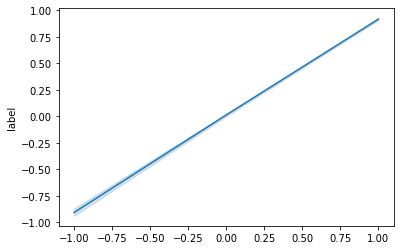

In [59]:
sns.lineplot(x = train_predict,y = Y_train)